In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

from matplotlib import pyplot as plt
sns.set_style("whitegrid")
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('/kaggle/input/countries-life-expectancy/Life expectancy.csv')
df.head()

,Entity,Year,Life expectancy
0,Australia,1802,34.049999
1,Australia,1803,34.049999
2,Australia,1804,34.049999
3,Australia,1805,34.049999
4,Australia,1806,34.049999


In [3]:
df.describe().T.iloc[:,1:]

,mean,std,min,25%,50%,75%,max
Year,1908.066093,62.613962,1800.000000,1854.0,1908.000000,1962.00,2016.000000
Life expectancy,48.680380,17.965669,8.108836,32.0,41.880001,66.82,83.940002


In [4]:
df_year_index = df.set_index("Year")
df_year_index.head()

,Entity,Life expectancy
Year,,
1802,Australia,34.049999
1803,Australia,34.049999
1804,Australia,34.049999
1805,Australia,34.049999
1806,Australia,34.049999


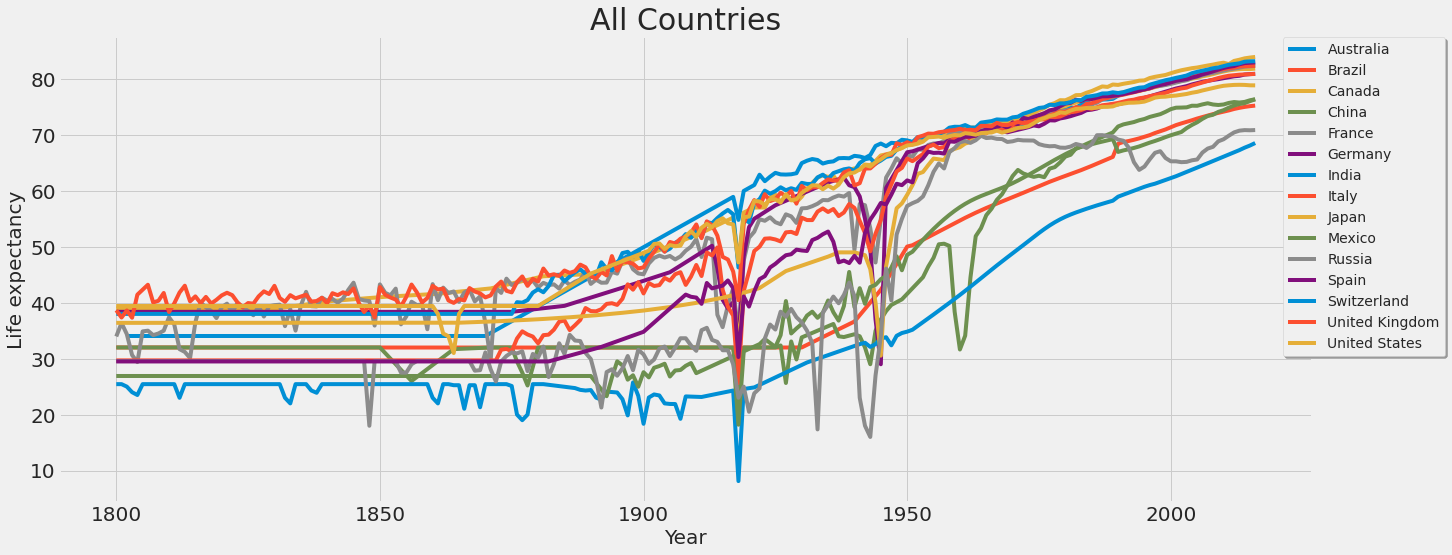

In [5]:
plt.figure(figsize=(20,8))
for country in df.Entity.unique():
    df_year_index[df_year_index["Entity"]==country]['Life expectancy'].plot(label=country)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    plt.xlabel("Year",fontsize=20)
    plt.ylabel("Life expectancy",fontsize=20)
plt.title("All Countries",fontsize=30)
plt.legend(bbox_to_anchor=(1.112,1.012),
          ncol=1, fancybox=True, shadow=True)
plt.show()

In [6]:
def country_visualizer(country):
    plt.figure(figsize=(20,8))
    for c in df.Entity.unique():
        if c == country:
            pass
        else:
            df_year_index[df_year_index["Entity"]==c]['Life expectancy'].plot(label=c,color="gray")
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
    
        plt.xlabel("Year",fontsize=20)
        plt.ylabel("Life expectancy",fontsize=20)
    df_year_index[df_year_index["Entity"]==country]['Life expectancy'].plot(label=country,color="red")
    plt.title(country.upper(),fontsize=25)
    plt.legend(bbox_to_anchor=(1.112,1.012),
          ncol=1, fancybox=True, shadow=True)
    plt.show()

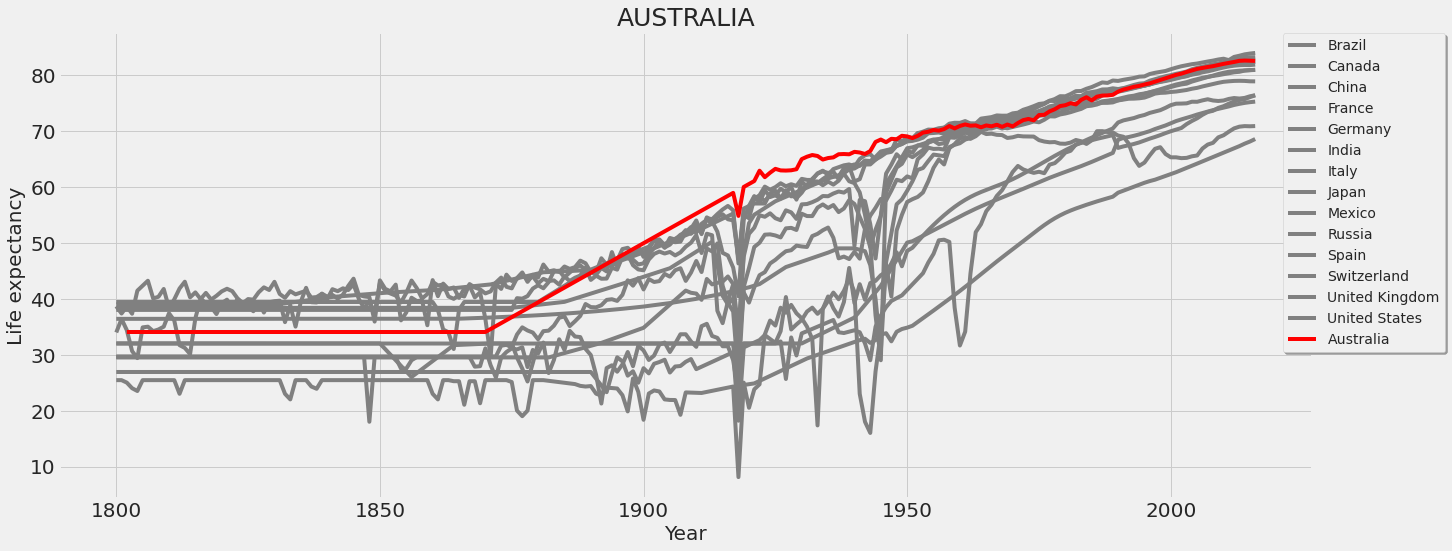

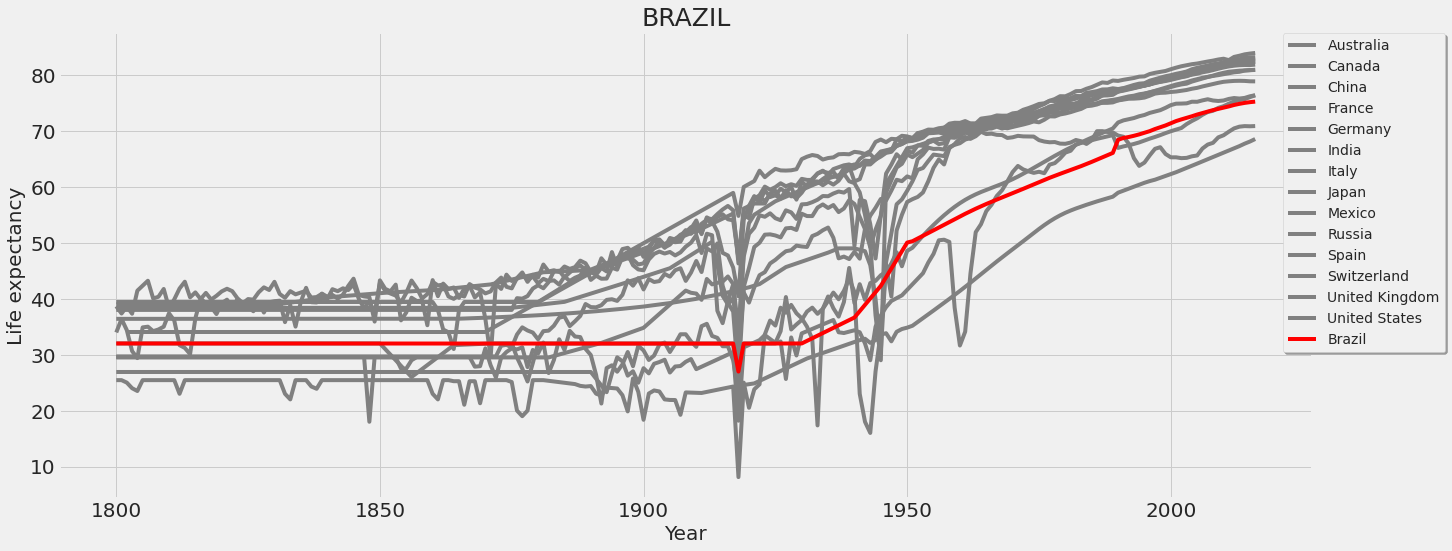

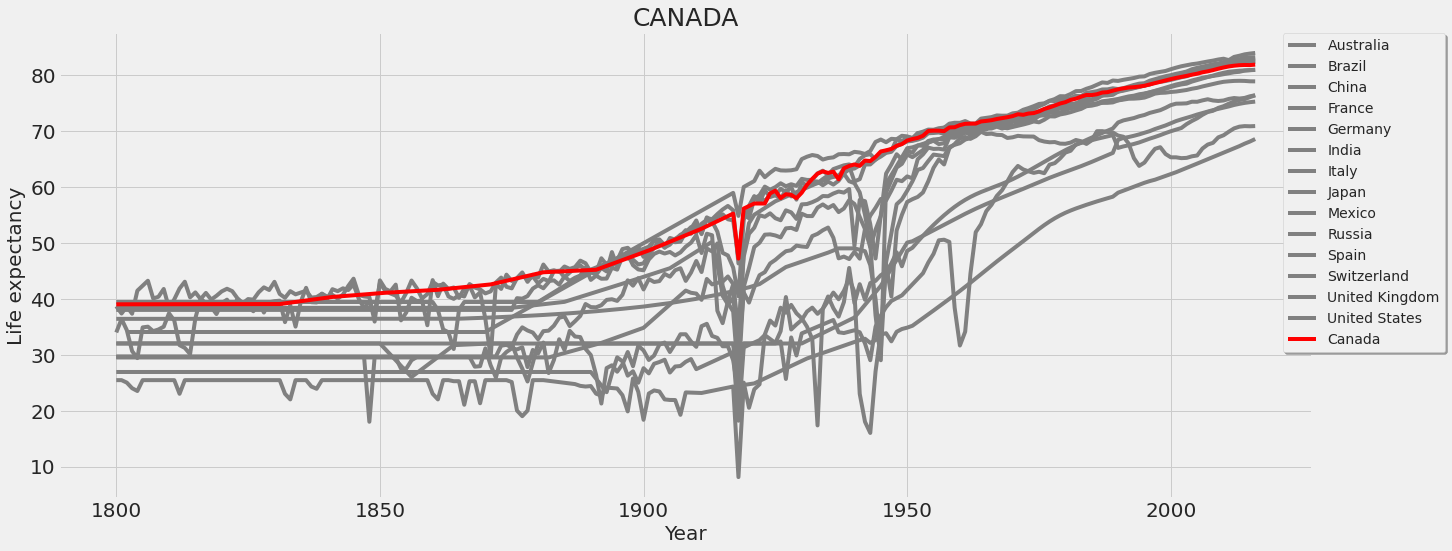

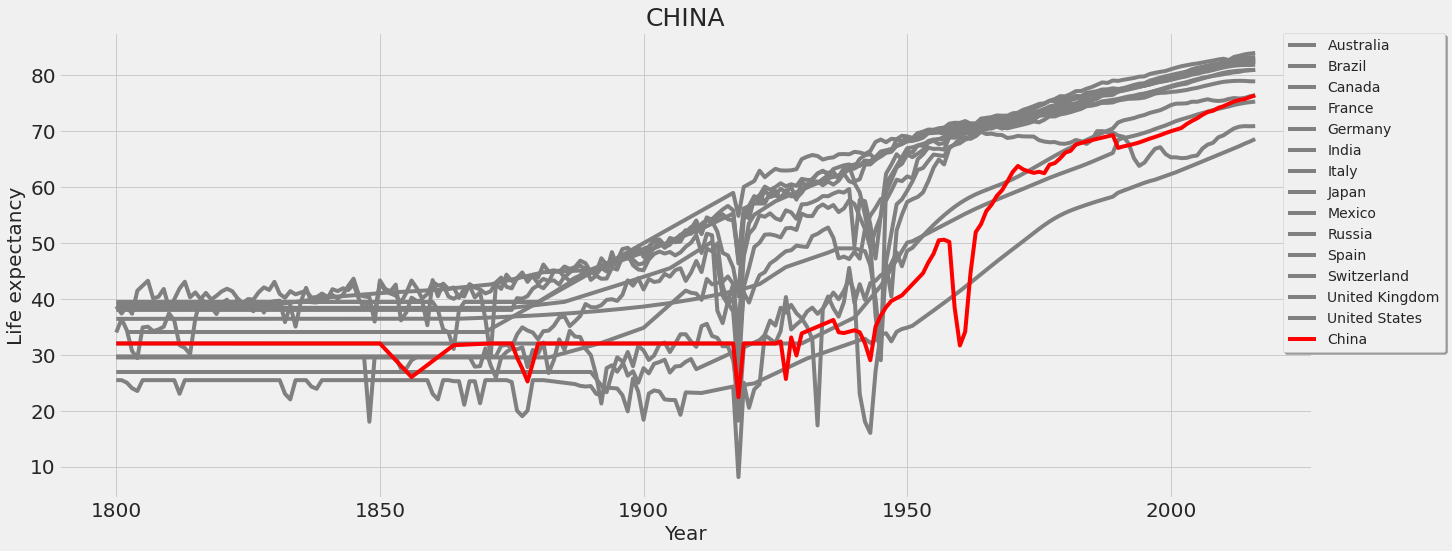

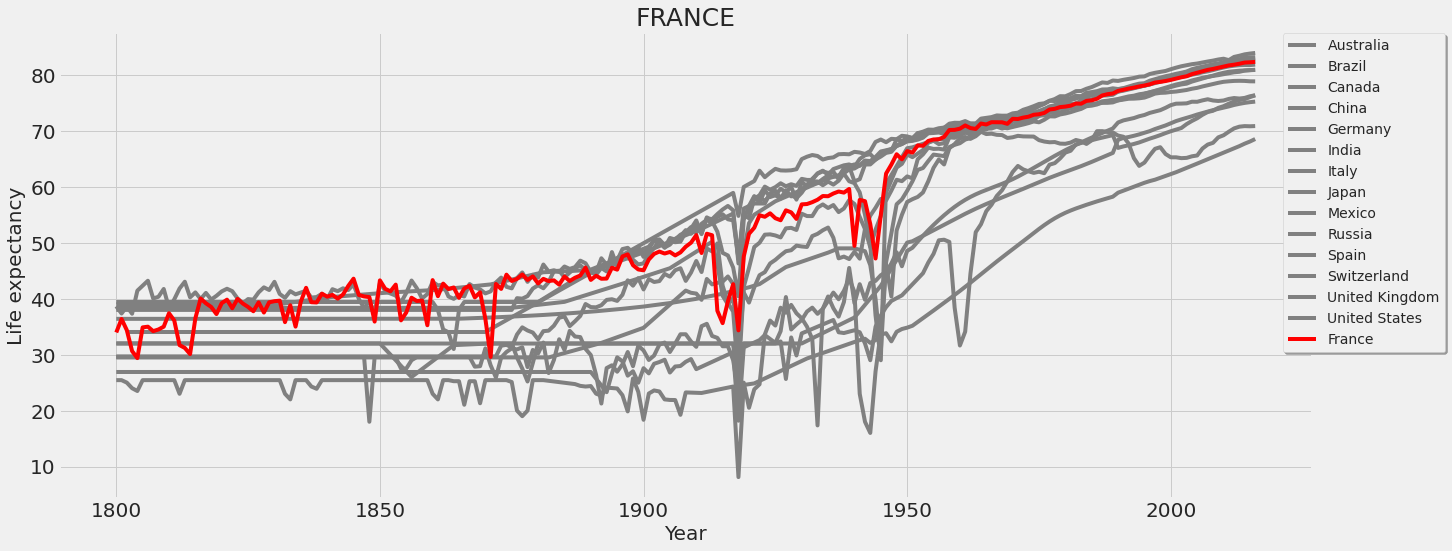

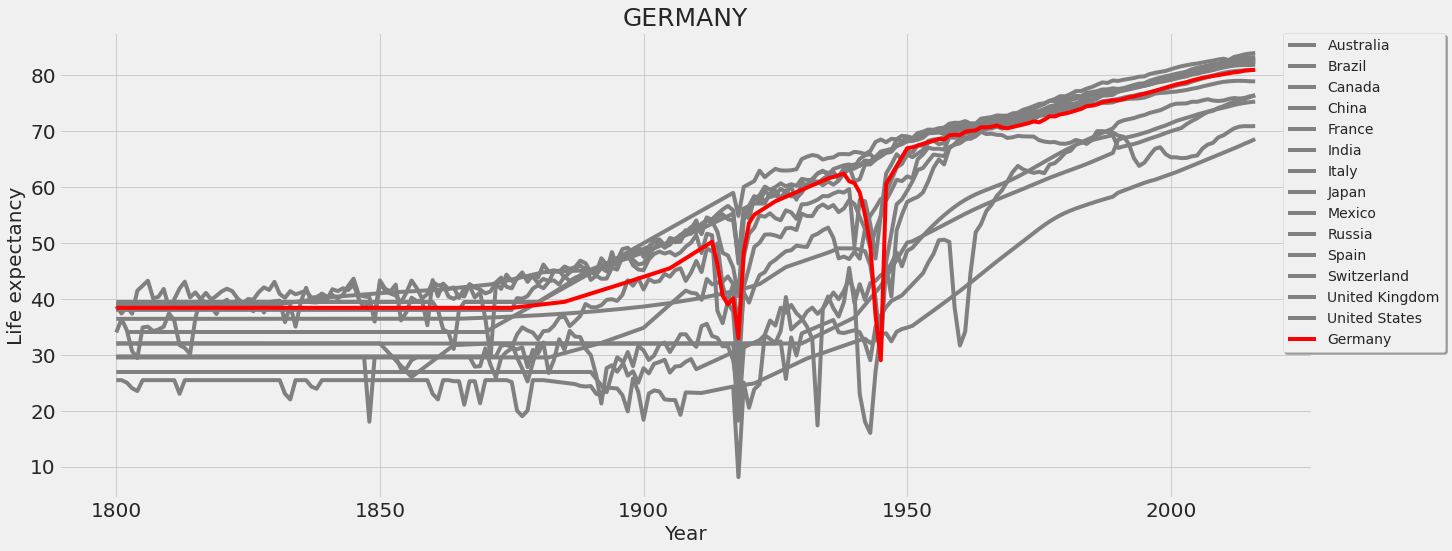

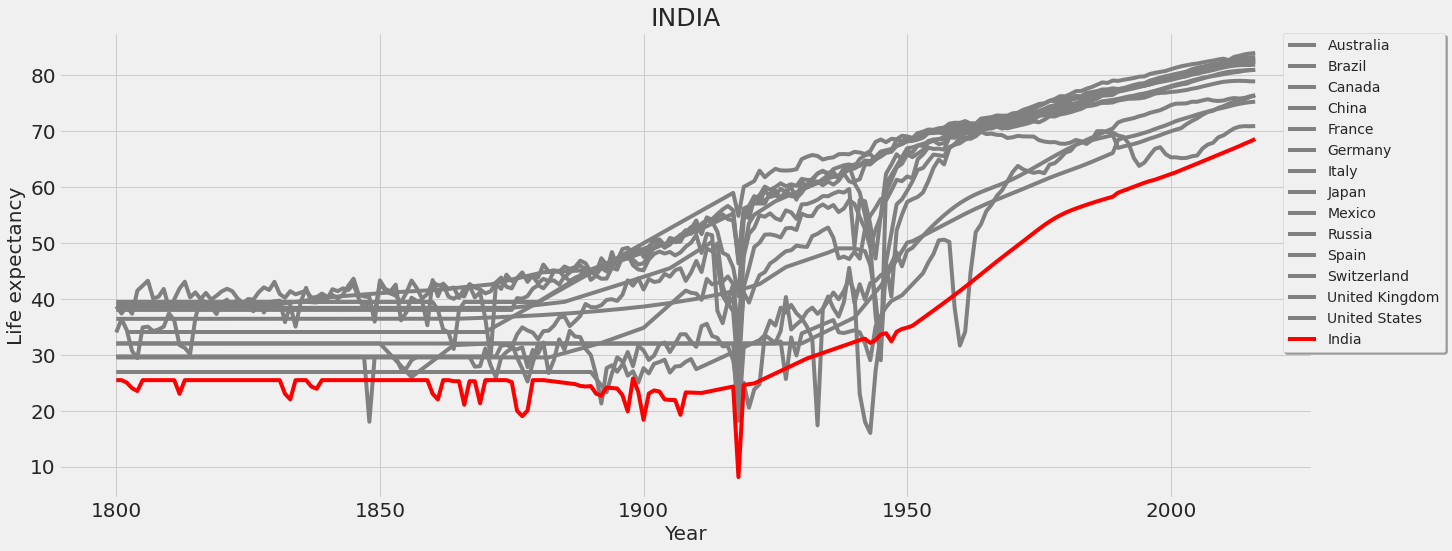

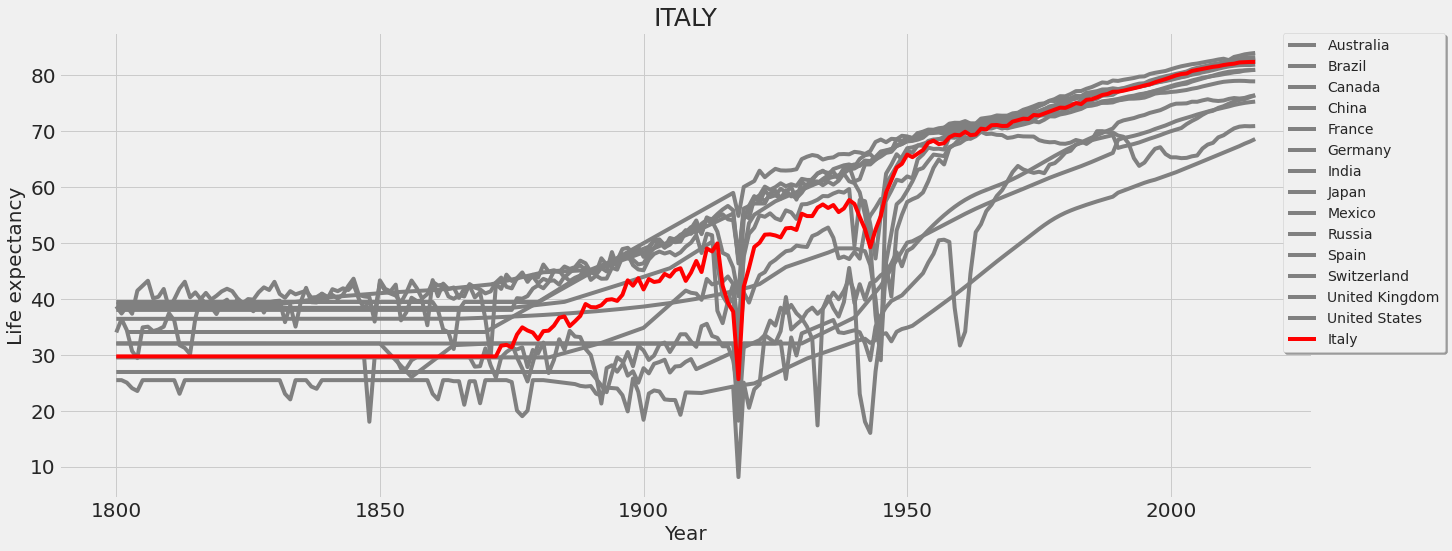

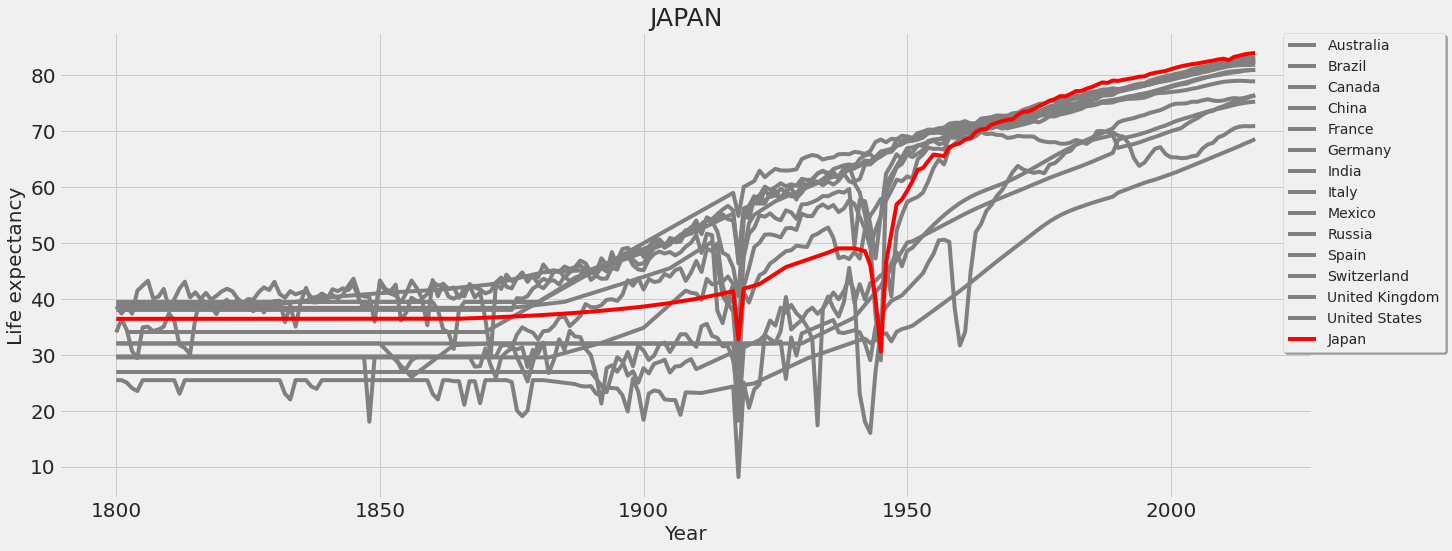

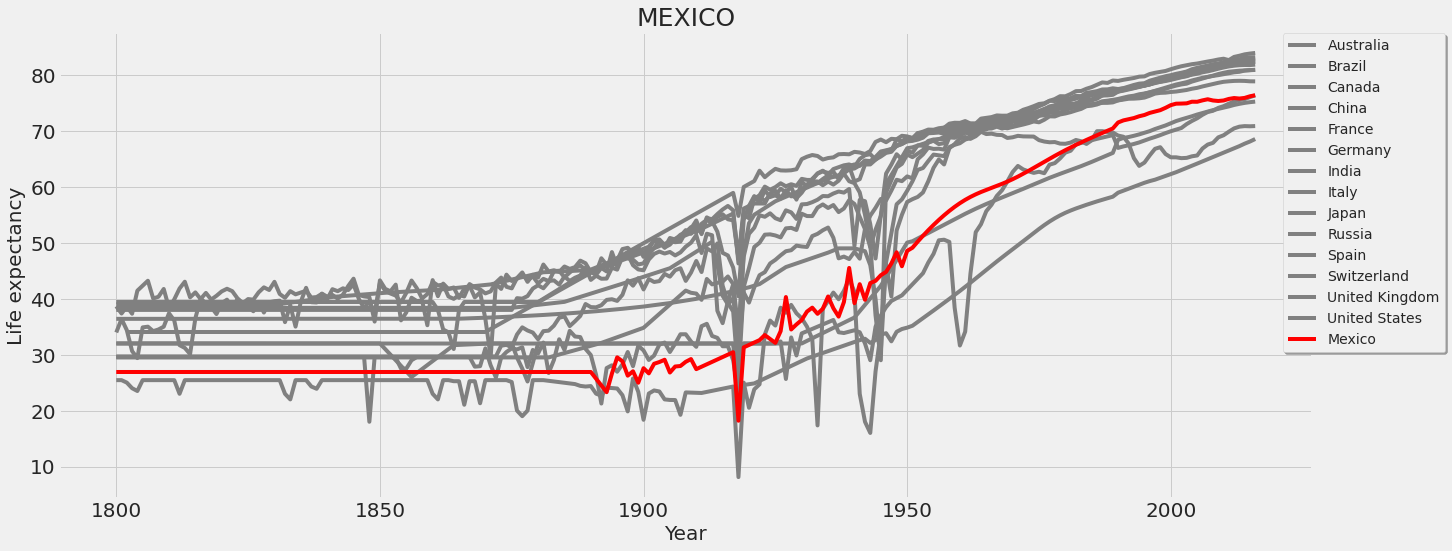

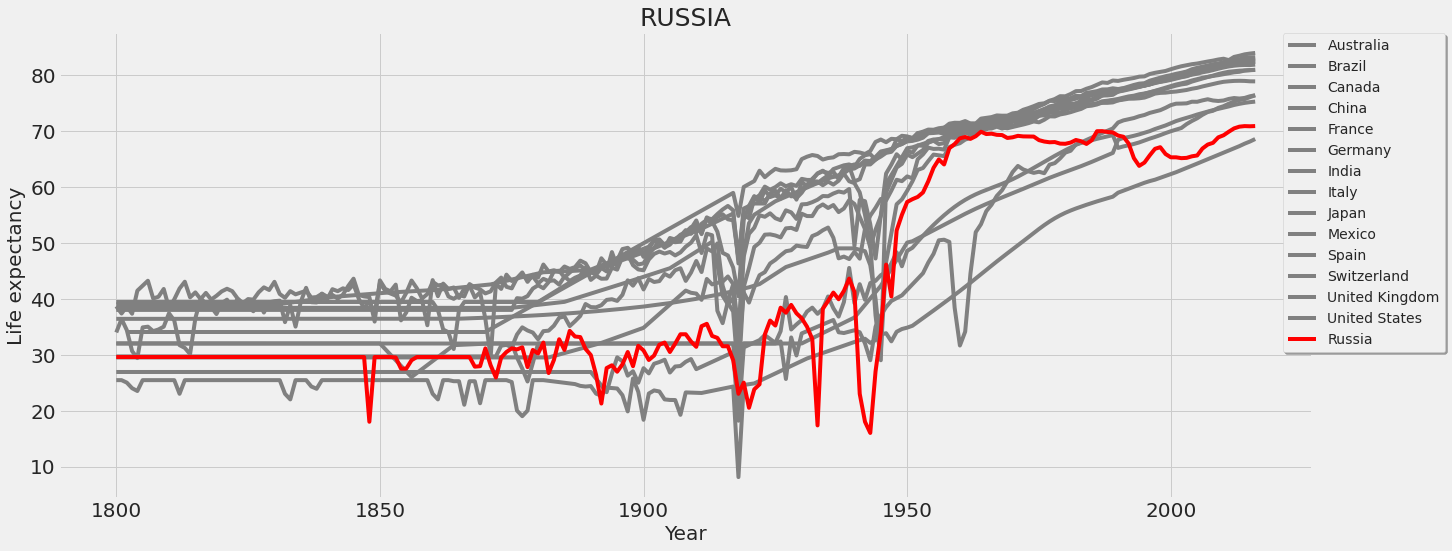

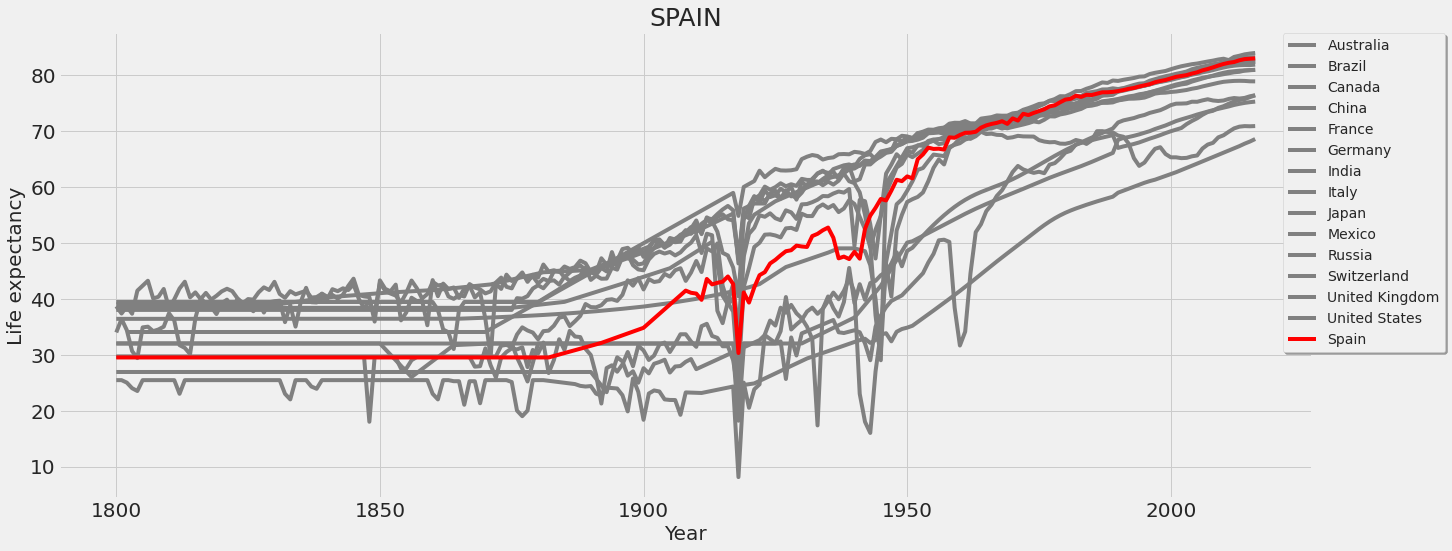

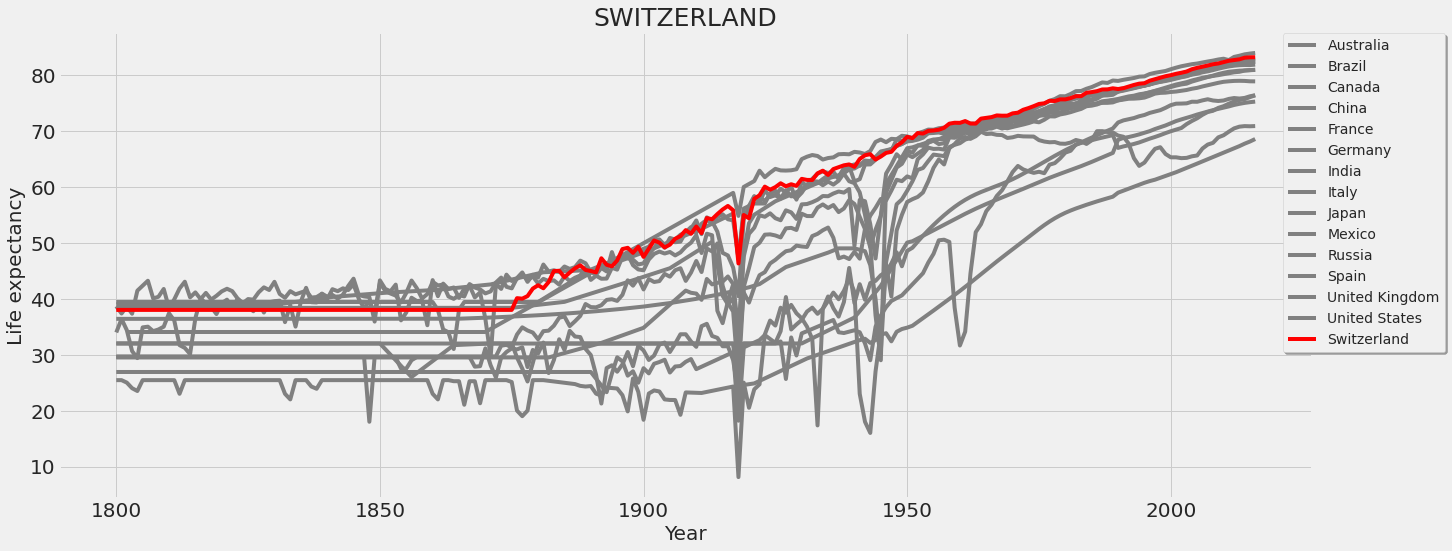

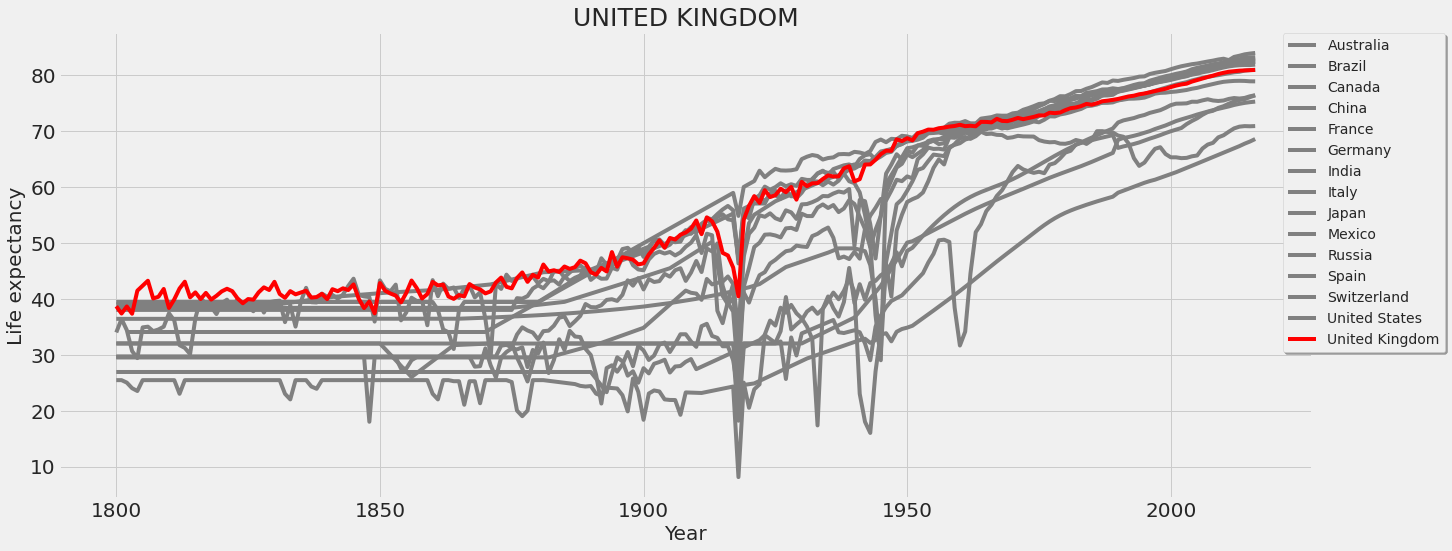

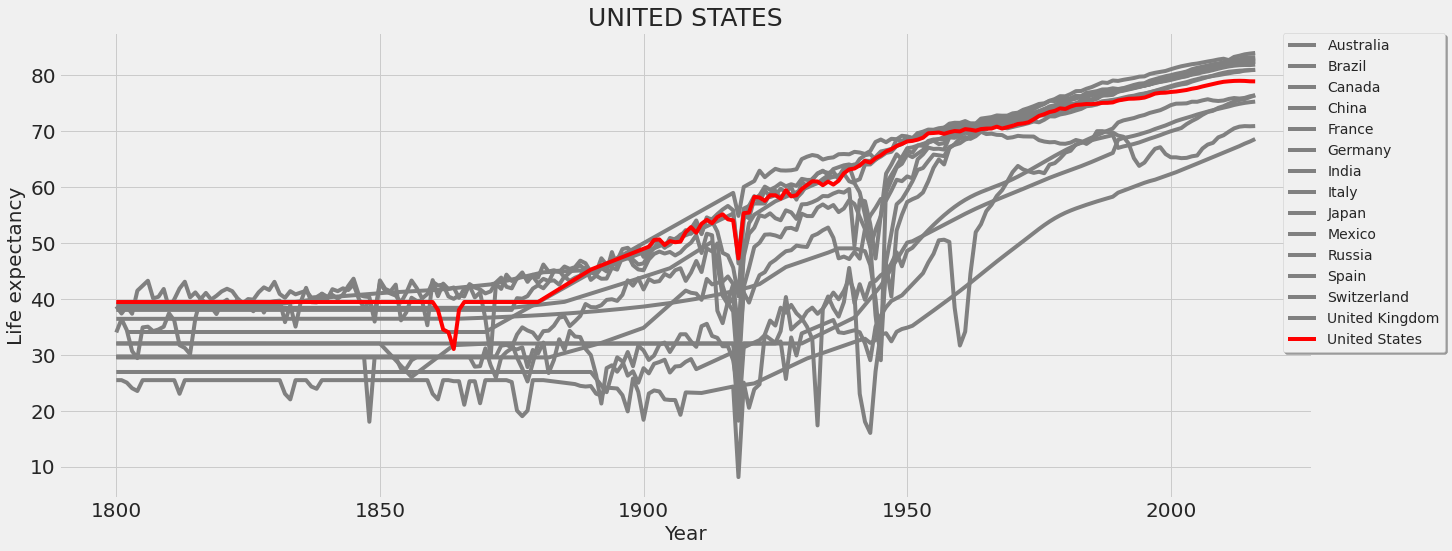

In [7]:
for c in df.Entity.unique():    
    country_visualizer(c)

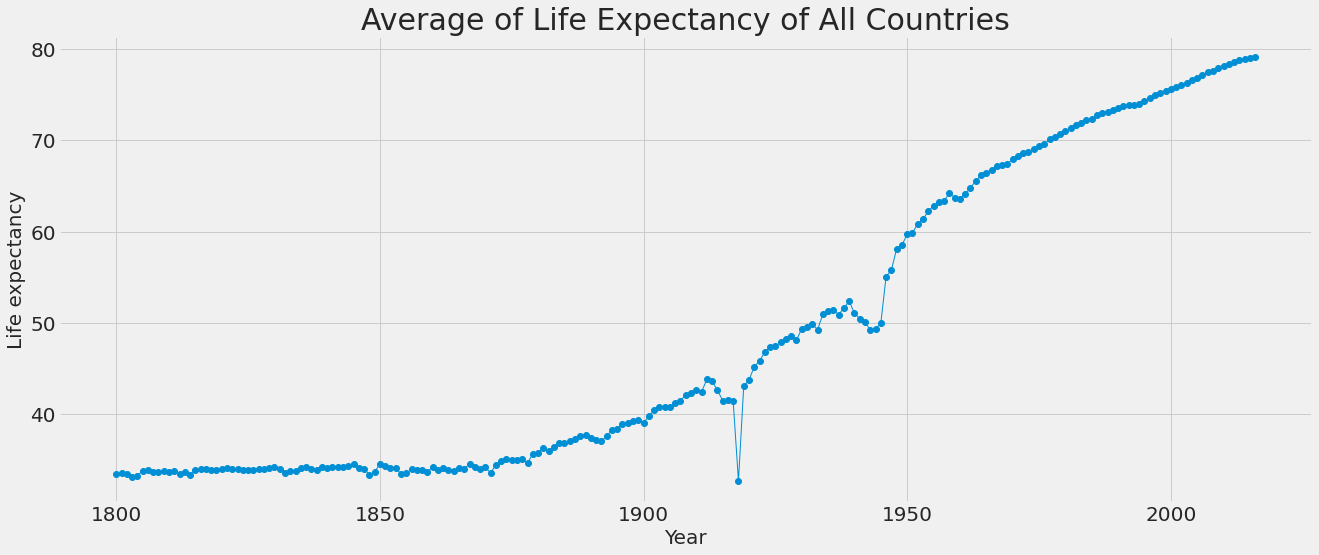

In [8]:
plt.figure(figsize=(20,8))
df.groupby("Year")["Life expectancy"].mean().plot(marker="o", lw=1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Life expectancy",fontsize=20)
plt.title("Average of Life Expectancy of All Countries",fontsize=30)
plt.show()

In [9]:
continent = []
for i in df.Entity:
    if i=="Brazil":
        continent.append("S. America")
    elif i=="Canada" or i=="Mexico" or i=="United States":
        continent.append("N. America")
    elif i=="China" or i=="India" or i=="Russia":
        continent.append("Asia")
    elif i=="France" or i=="Germany" or i=="Italy" or i=="Japan" or i=="Spain" or i=="Switzerland" or i=="United Kingdom":
        continent.append("Europe")
    else:
        continent.append("Oceania")
df["Continent"] = continent
df.head()

,Entity,Year,Life expectancy,Continent
0,Australia,1802,34.049999,Oceania
1,Australia,1803,34.049999,Oceania
2,Australia,1804,34.049999,Oceania
3,Australia,1805,34.049999,Oceania
4,Australia,1806,34.049999,Oceania


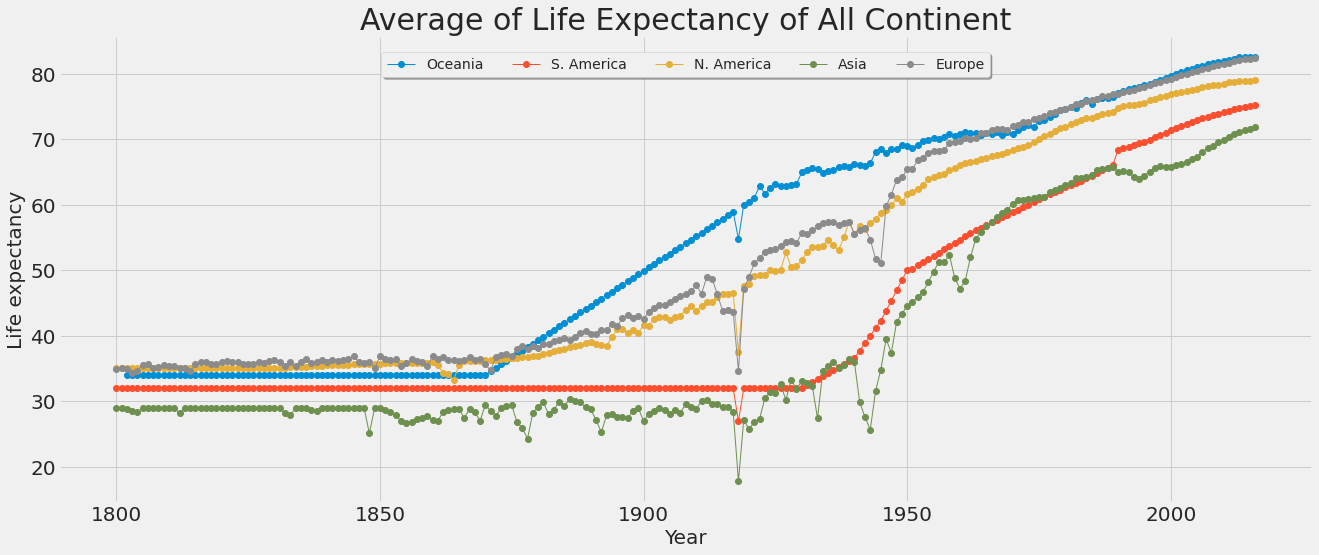

In [10]:
plt.figure(figsize=(20,8))
for c in df.Continent.unique():
    df[df["Continent"]==c].groupby("Year")["Life expectancy"].mean().plot(marker="o", lw=1, label=c)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel("Year",fontsize=20)
    plt.ylabel("Life expectancy",fontsize=20)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.98),
          ncol=5, fancybox=True, shadow=True)
plt.title("Average of Life Expectancy of All Continent",fontsize=30)
plt.show()